## Load Results

In [1]:
from process_helper import *

In [2]:
isf_high = read_add_col('_isf_high_dim', True)
lof_high = read_add_col('_lof_high_dim', True)
ocsvm_high = read_add_col('_ocsvm_high_dim', True)
main = read_add_col('', False)
ocsvm = read_add_col('_ocsvm', False)
lof = read_add_col('_lof_2', False)

In [3]:
df = pd.concat([main, isf_high, lof_high, ocsvm, lof])

In [4]:
yeast = df[df['dataname']=='yeast']
abalone = df[df['dataname']=='abalone']

## Experiment Setup
### Baselines
* **"overall"**: run outlier detection algorithm on every column and take the union of detected outliers (tuples)
* **"structured"**: for each column, for each tuple, find the **neighbors** of the tuple and run outlier detection algorithm on these subsamples, then take the union of the detected outliers.
    * ways to find neighbors: 
        * **knn (param: size of neighbor k)**: for a high-dim case, for each dimension, find the k-nearest neighbors (euclidean distance for numeric, cosine distance for text), then take the intersection of the knn for all dimensions. 
        * **knn-high-dim (param: size of neighbor k)**: for a high-dim case, find the k-nearest neighbors (euclidean distance for numeric, cosine distance for text) in the high-dim space directly.
        * **threshold**: for a high-dim case, for each dimension, find the neighbors with distances within certain threshold, i.e., if the differences for two value (cosine distance for text) is within certain threshold, we will say they are the same. (the threshold is set to be the same as the threshold used in detecting structure constraints)
* **"combined"**: take the union of the outliers detected by "overall" and "structured"

### Outlier Detection Algorithms
* **isf**: isolation forest
* **lof**: local outlier factor
* **ocsvm**: one-class svm

### Datasets
* yeast: 1,485 samples
* abalone: 4,177 samples
* both data have categorical, numeric attributes

## Hypothesis 1
With structure, we can find more outliers by looking for tuples that violates the structure we found.
* proxy: 
    * with the help of structural constraints, the recall can be boosted while the precision should not be affected too much, otherwise, it may be that the improvements in recall is due to more false positives. 
    * f-1 should be no worse

### 1.1 Mean Improvements in Recall
* improvements: "combined" recall - "overall" recall

max improvements: 0.0666


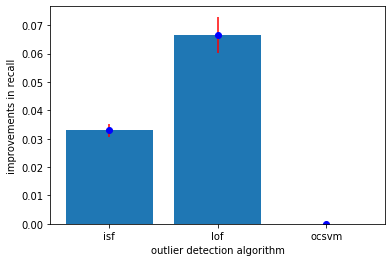

In [5]:
vis_recall_improv(yeast)

max improvements: 0.0685


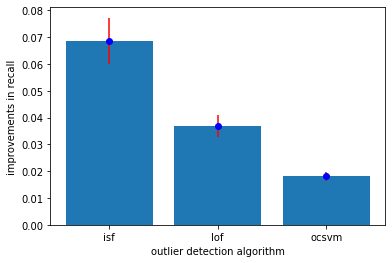

In [6]:
vis_recall_improv(abalone)

* takeaway: structure constraints indeed can help find more outliers. for yeast, it can find 33 more outliers at most with total number of outliers in groundtruth is 507; for abalone, it can find 142 more outliers at most with total number of outliers in groundtruth is 2081;

### best F-1

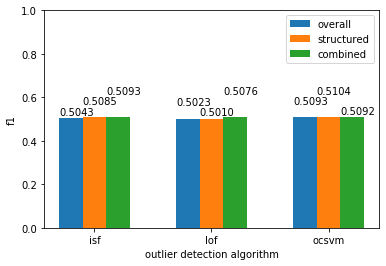

In [7]:
visualize_best_f1(yeast)

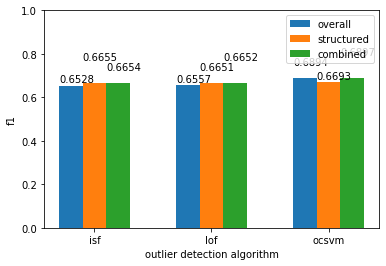

In [8]:
visualize_best_f1(abalone)

* takeaway: f-1 is approximately the same.
* really minimal improvements by incorporating structure constraints in outlier detection

## Experiment 2
* compare different methods for finding neighbors

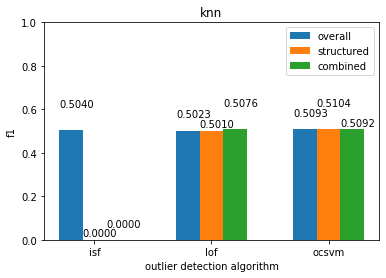

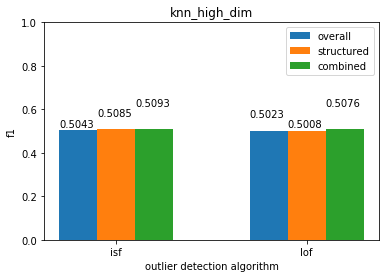

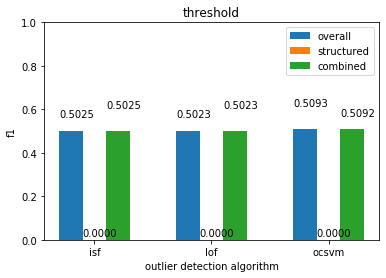

In [9]:
vis_diff_neighbors(yeast)

* takeaway: knn has the best result.

## Experiment 3 
* for knn, show the influence of neighbor size

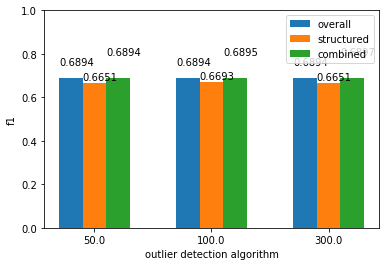

In [12]:
visualize_best_f1(abalone, groupby='size_neighbor')

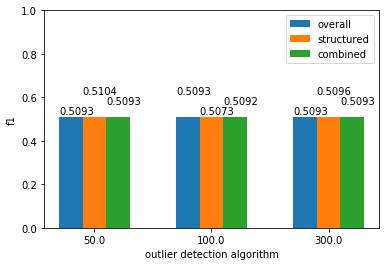

In [14]:
visualize_best_f1(yeast, groupby='size_neighbor')

* takeaway: neighbor size have trivial influence.